<h3>Τεχνικές Εξόρυξης Δεδομένων
Εαρινό Εξάμηνο 2019-2020
2η Άσκηση
</h3>

In [16]:
import glob
import pandas as pd
import numpy as np
import os
import io
import csv
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

from sklearn import preprocessing
from sklearn import metrics


In [2]:

# train = 'train_set.tsv'
# counter = 0
# with open(train, 'wt') as out_file:
#     tsv_writer = csv.writer(out_file, delimiter='\t')
#     tsv_writer.writerow(['Id', 'Title','Content','Category'])
#     work_dir = "fulltext/data/business"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"business"])
#             counter += 1
#     work_dir = "fulltext/data/entertainment"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"entertainment"])
#             counter += 1
#     work_dir = "fulltext/data/politics"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"politics"])
#             counter += 1
#     work_dir = "fulltext/data/tech"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r", encoding="utf-8") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"tech"])
#             counter += 1
#     work_dir = "fulltext/data/sport"
#     for path in sorted(glob.glob(os.path.join(work_dir, "*.txt"))):
#         with io.open(path, mode="r") as fd:
#             title = fd.readline()
#             content = ""
#             line = fd.readline()
#             while line:
#                 content += " " + line
#                 line = fd.readline()
#             tsv_writer.writerow([counter, title ,content,"sport"])
#             counter += 1
          


In [3]:
trainDf = pd.read_csv("train_set.tsv",sep='\t')
trainDf = trainDf.replace('\n','', regex=True)

In [4]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        2225 non-null   int64 
 1   Title     2225 non-null   object
 2   Content   2225 non-null   object
 3   Category  2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


In [5]:
businessDf = trainDf.loc[trainDf['Category'] == 'business'] 
entertainmentDf = trainDf.loc[trainDf['Category'] == 'entertainment'] 
politicsDf = trainDf.loc[trainDf['Category'] == 'politics'] 
sportDf = trainDf.loc[trainDf['Category'] == 'sport'] 
techDf = trainDf.loc[trainDf['Category'] == 'tech'] 

<h3>1. Δημιουργία WordCloud</h3>

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS) 

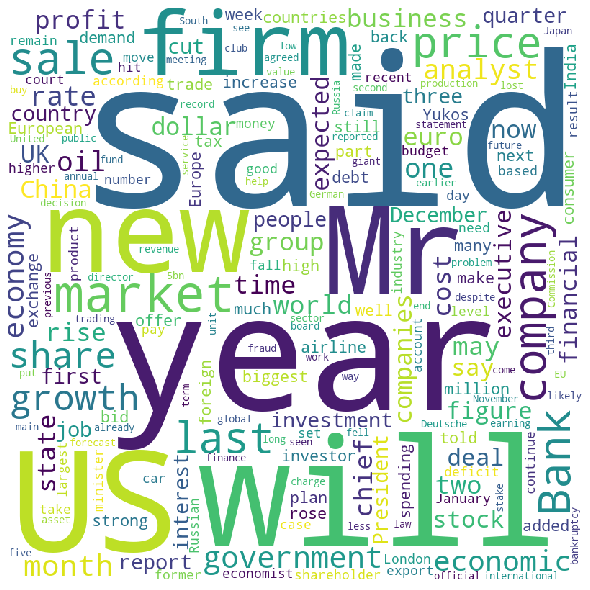

In [7]:
businessList = businessDf['Content'].tolist()
flatList = []
for b in businessList:
    parsed = b.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

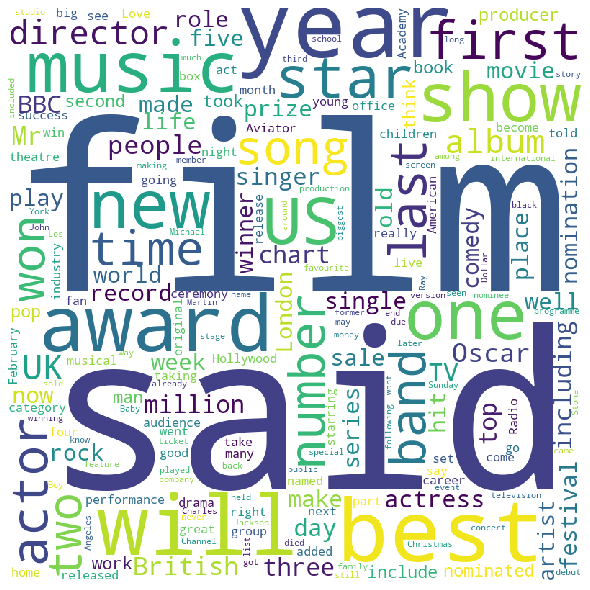

In [8]:
entertainmentList = entertainmentDf['Content'].tolist()
flatList = []
for e in entertainmentList:
    parsed = e.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

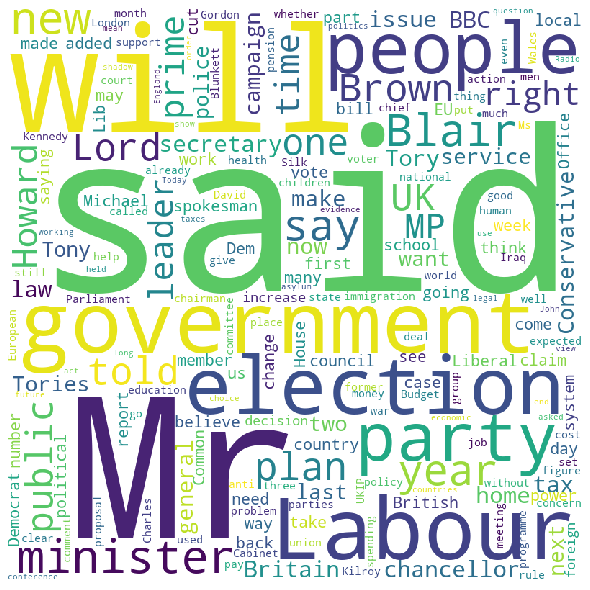

In [9]:
politicsList = politicsDf['Content'].tolist()
flatList = []
for p in politicsList:
    parsed = p.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

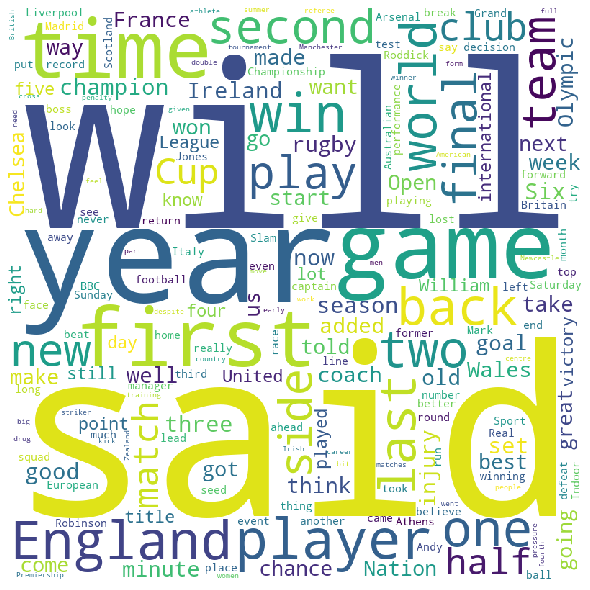

In [10]:
sportList = sportDf['Content'].tolist()
flatList = []
for s in sportList:
    parsed = s.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

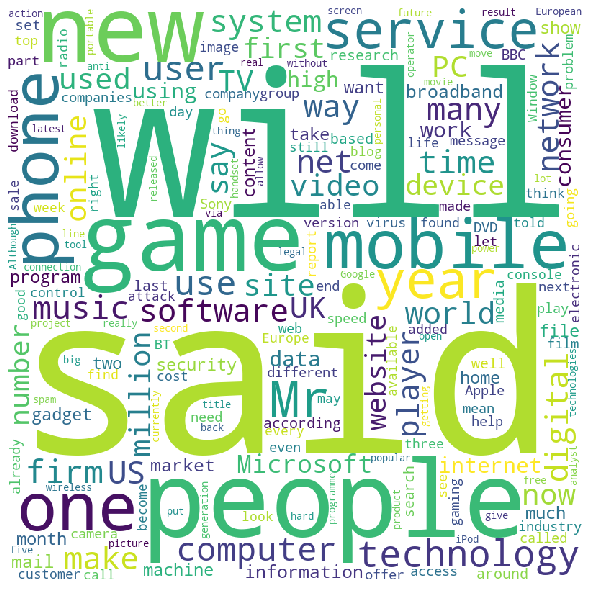

In [11]:
techList = techDf['Content'].tolist()
flatList = []
for t in techList:
    parsed = t.split()
    for item in parsed:
        flatList.append(item)

        
clean_string = ' '.join(flatList)

wordcloud = WordCloud(width = 800, height = 800,collocations = False,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(clean_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

<h3>2.Υλοποίηση Κατηγοριοποίησης (Classification- tf-idf)</h3>

In [12]:
content_train, content_test, category_train, category_test = train_test_split(trainDf['Content'], trainDf['Category'], test_size=0.2)

#create numeric categories using the LabelEncoder and fit-transorm pipeline
le = preprocessing.LabelEncoder()
le.fit(category_train)
category_train = le.transform(category_train)
category_test = le.transform(category_test)

In [13]:
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
contentList = content_train.tolist()
X_train = vectorizer.fit_transform(contentList)
testList = content_test.tolist()
X_test = vectorizer.transform(testList)


Support Vector Machines

In [54]:
classifier = svm.SVC()
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)


In [55]:
print(metrics.accuracy_score(category_test, predictions))

0.9797752808988764


In [80]:
# recall
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(category_test, predictions, average='macro'))
print(precision_recall_fscore_support(category_test, predictions, average='micro'))
print(precision_recall_fscore_support(category_test, predictions, average='weighted'))
print(precision_recall_fscore_support(category_test, predictions, average=None))

print()
#precision
from sklearn.metrics import precision_score
print(precision_score(category_test, predictions, average='macro'))
print(precision_score(category_test, predictions, average='micro'))
print(precision_score(category_test, predictions, average='weighted'))
print(precision_score(category_test, predictions, average=None))

print()
# F-measure (F1-score)
from sklearn.metrics import f1_score
print(f1_score(category_test, predictions, average='macro'))
print(f1_score(category_test, predictions, average='micro'))
print(f1_score(category_test, predictions, average='weighted'))
print(f1_score(category_test, predictions, average=None))

(0.9788635112823336, 0.9806741550805645, 0.97966097049541, None)
(0.9797752808988764, 0.9797752808988764, 0.9797752808988764, None)
(0.9801799793461254, 0.9797752808988764, 0.979877330105459, None)
(array([0.9826087 , 0.975     , 0.93670886, 1.        , 1.        ]), array([0.96581197, 0.98734177, 0.97368421, 0.98969072, 0.98684211]), array([0.97413793, 0.98113208, 0.95483871, 0.99481865, 0.99337748]), array([117,  79,  76,  97,  76], dtype=int64))

0.9788635112823336
0.9797752808988764
0.9801799793461254
[0.9826087  0.975      0.93670886 1.         1.        ]

0.97966097049541
0.9797752808988764
0.979877330105459
[0.97413793 0.98113208 0.95483871 0.99481865 0.99337748]


Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)

In [ ]:
print(metrics.accuracy_score(category_test, predictions))

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import *
from scipy import *

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train.todense(), category_train)
predictions = classifier.predict(X_test.todense())

In [ ]:
print(metrics.accuracy_score(category_test, predictions))

K-Nearest Neighbor

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter
import itertools
# distance between rows of X

def find_category(row,k):
    distances = []
    distances = euclidean_distances(X_train , X_test[row])
    categories = [x for _,x in sorted(zip(distances,category_train))]

    results = categories[:k]
    keys = Counter(results).keys()
    freq = Counter(results).values()
    mostFreq = [x for _,x in sorted(zip(freq,keys))]
    mostFreq = [ele for ele in reversed(mostFreq)] 
    mostFreq = mostFreq[:1]
    return mostFreq


def k_nearest_neighbour(k):
    predictions = []
    for i in range(0,X_test.shape[0]):
        predictions.append(find_category(i,k))
    return predictions


predictions1 = k_nearest_neighbour(1)

In [ ]:
predictions = list(itertools.chain(*predictions1))
print(metrics.accuracy_score(category_test, predictions))

<h3> 2.Υλοποίηση Κατηγοριοποίησης (Classification - BoW) </h3>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
contentList = content_train.tolist()
X_train = vectorizer.fit_transform(contentList)
testList = content_test.tolist()
X_test = vectorizer.transform(testList)

Support Vector Machines

In [ ]:
classifier = svm.SVC()
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)

In [ ]:
print(metrics.accuracy_score(category_test, predictions))

Random Forests

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, category_train)

predictions = classifier.predict(X_test)

In [ ]:
print(metrics.accuracy_score(category_test, predictions))

Naive Bayes

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train.todense(), category_train)
predictions = classifier.predict(X_test.todense())

In [ ]:
print(metrics.accuracy_score(category_test, predictions))

K-Nearest Neighbor

In [ ]:
def find_category(row,k):
    distances = []
    distances = euclidean_distances(X_train , X_test[row])
    categories = [x for _,x in sorted(zip(distances,category_train))]

    results = categories[:k]
    keys = Counter(results).keys()
    freq = Counter(results).values()
    mostFreq = [x for _,x in sorted(zip(freq,keys))]
    mostFreq = [ele for ele in reversed(mostFreq)] 
    mostFreq = mostFreq[:1]
    return mostFreq


def k_nearest_neighbour(k):
    predictions = []
    for i in range(0,X_test.shape[0]):
        predictions.append(find_category(i,k))
    return predictions


predictions1 = k_nearest_neighbour(1)

In [ ]:
predictions = list(itertools.chain(*predictions1))
print(metrics.accuracy_score(category_test, predictions))

<h3>4. Υλοποίηση Συσταδοποίησης (Clustering)</h3>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
print(metrics.accuracy_score( y_test, y_score))